Download the facebook.csv file from the data directory  test02. In the dataset, remove the first three variables. Use the set prepared in this way in the next subsection.

Clustering








In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform


data_raw=pd.read_csv('../content/facebook.csv')
data_raw


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,134115277150304_181886762373155,photo,10/8/2017 0:24,7,0,0,7,0,0,0,0,0
1,134115277150304_181804739048024,photo,10/7/2017 20:24,95,3,0,93,1,1,0,0,0
2,134115277150304_181615945733570,photo,10/7/2017 5:57,9,0,0,9,0,0,0,0,0
3,134115277150304_181523192409512,video,10/7/2017 0:56,328,662,62,222,104,0,1,1,0
4,134115277150304_181504085744756,photo,10/6/2017 23:06,557,27,2,517,36,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,614855718638584_685187868272035,status,12/24/2017 23:58,137,162,0,136,0,0,1,0,0
395,614855718638584_685163814941107,status,12/24/2017 23:20,7,0,1,7,0,0,0,0,0
396,614855718638584_684600291664126,video,12/24/2017 7:04,200,752,184,126,74,0,0,0,0
397,614855718638584_685187868272035,status,12/24/2017 23:58,137,162,0,136,0,0,1,0,0


In [2]:
data_raw= data_raw[data_raw.columns[3:]]
data_raw

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,7,0,0,7,0,0,0,0,0
1,95,3,0,93,1,1,0,0,0
2,9,0,0,9,0,0,0,0,0
3,328,662,62,222,104,0,1,1,0
4,557,27,2,517,36,3,1,0,0
...,...,...,...,...,...,...,...,...,...
394,137,162,0,136,0,0,1,0,0
395,7,0,1,7,0,0,0,0,0
396,200,752,184,126,74,0,0,0,0
397,137,162,0,136,0,0,1,0,0


In [3]:
# Check for missing values
data_raw.isnull().sum()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [4]:
#Scaling the data
sc=StandardScaler()
data=sc.fit_transform(data_raw)
data

array([[-0.79008375, -0.54949422, -0.56060855, ..., -0.44042023,
        -0.15327434, -0.14574987],
       [-0.00534157, -0.5434607 , -0.56060855, ..., -0.44042023,
        -0.15327434, -0.14574987],
       [-0.7722487 , -0.54949422, -0.56060855, ..., -0.44042023,
        -0.15327434, -0.14574987],
       ...,
       [ 0.93099852,  0.96290905,  1.18825001, ..., -0.44042023,
        -0.15327434, -0.14574987],
       [ 0.36919446, -0.22368394, -0.56060855, ...,  0.34059164,
        -0.15327434, -0.14574987],
       [-0.79008375, -0.54949422, -0.55110388, ..., -0.44042023,
        -0.15327434, -0.14574987]], shape=(399, 9))

Decide the number of groups in a set, in kmeans clustering. Write why you choose a given number of clusters. Write the number of selected clusters as your answer.

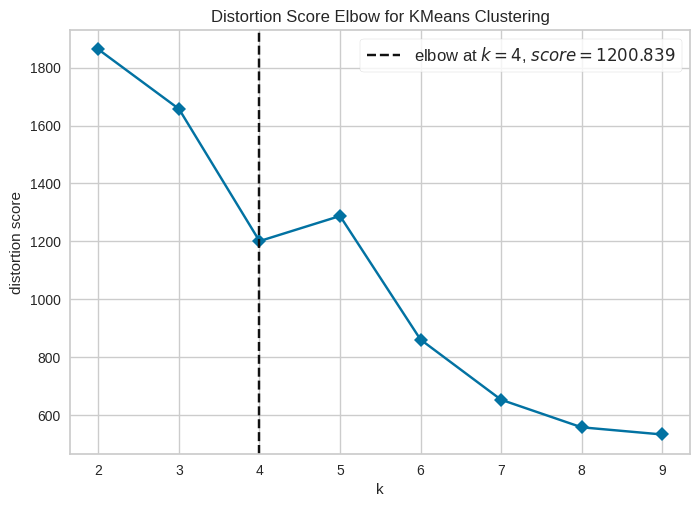

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Elbow Method

# KMeans
km=KMeans()
km.fit(data)

# Visualization
visualizer = KElbowVisualizer(km, k=(2,10), timings=False)
visualizer.fit(data)
visualizer.show()

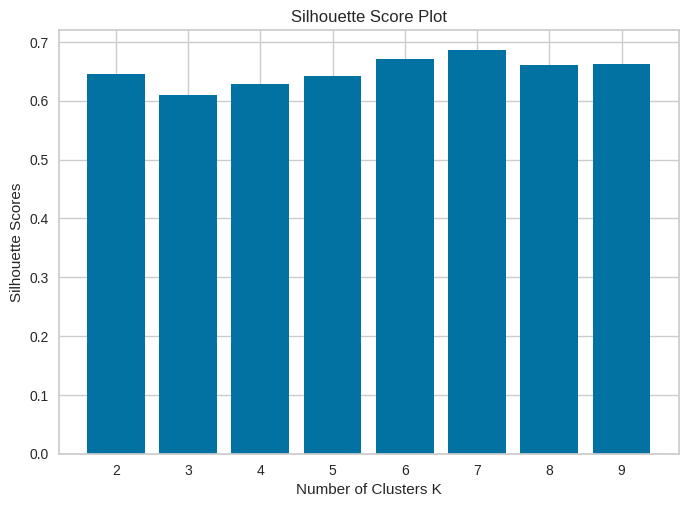

In [6]:
# Silhouette Method

score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=1)
    kmeans_model.fit(data)
    pred = kmeans_model.predict(data)
    score = silhouette_score(data, pred, metric='euclidean')
    score_list.append(score)

# Plot the Silhouette Score and number of cluster
plt.bar(range(2, 10), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Scores')
plt.show()

We can see the optimal number of clusters is k=7 for both methods.

Cluster the data using the kmeans method.

In [7]:
km=KMeans(n_clusters=7, random_state=1)
km.fit(data)
pred=km.predict(data)
pred

array([1, 1, 1, 2, 4, 1, 2, 1, 2, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 2, 1, 1, 2, 1, 1, 4, 1, 0, 2, 2,
       1, 2, 1, 2, 1, 1, 6, 6, 1, 1, 1, 1, 6, 4, 1, 6, 1, 2, 1, 1, 2, 1,
       6, 1, 2, 1, 2, 2, 1, 2, 6, 1, 2, 6, 2, 1, 0, 6, 1, 0, 1, 1, 1, 2,
       2, 1, 6, 1, 1, 1, 6, 1, 1, 2, 1, 1, 6, 6, 1, 1, 2, 0, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 1, 6, 2, 1, 6, 1, 1, 6, 1, 1, 2, 6, 1, 6, 1, 1, 6,
       1, 0, 1, 1, 0, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 1, 6, 1, 1, 1, 1, 1,
       1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 5, 3, 1, 1, 1, 6, 1, 5, 5, 1, 1, 5,
       1, 5, 5, 1, 3, 0, 3, 1, 1, 1, 0, 1, 1, 1, 4,

Generate a chart of the distribution of silhouettes in your clustering. Calculate the average silhouette value for the dataset in this clustering. Write its value as the answer. 

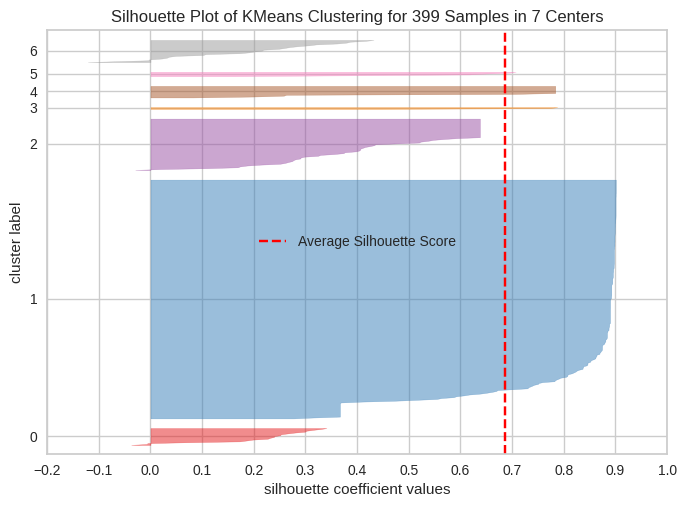

Average Silhouette Score: 0.6857732366533764


In [8]:
# Visualization
visualizer = SilhouetteVisualizer(km)
visualizer.fit(data)
visualizer.show()

# Average Silhouette Score
sil_score= silhouette_score(data, pred, metric='euclidean')
print("Average Silhouette Score:", sil_score)

Transfer the observations from the largest cluster into a data frame, name it with your name, describe this cluster you have found. Give the distribution (proportion) of the variable status_type in your largest cluster.

In [9]:
data_raw['Cluster']=pred

biggest_cluster=data_raw.groupby('Cluster').mean()
biggest_cluster['Count']=data_raw['Cluster'].value_counts()
biggest_cluster.sort_values('Count', ascending=False).head(1)

/tmp/ipykernel_5212/3913867663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['Cluster']=pred


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Count
Cluster,,,,,,,,,,
1,29.118081,10.380074,0.391144,28.800738,0.199262,0.04797,0.070111,0.188192,0.254613,271


In [10]:
leandro=data_raw.loc[data_raw['Cluster']==1]
leandro

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,7,0,0,7,0,0,0,0,0,1
1,95,3,0,93,1,1,0,0,0,1
2,9,0,0,9,0,0,0,0,0,1
5,11,0,0,11,0,0,0,0,0,1
7,15,10,0,14,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
392,19,2,0,19,0,0,0,0,0,1
394,137,162,0,136,0,0,1,0,0,1
395,7,0,1,7,0,0,0,0,0,1
397,137,162,0,136,0,0,1,0,0,1


Plot a dataset as a hierarchically-clustered heatmap.

<Axes: >

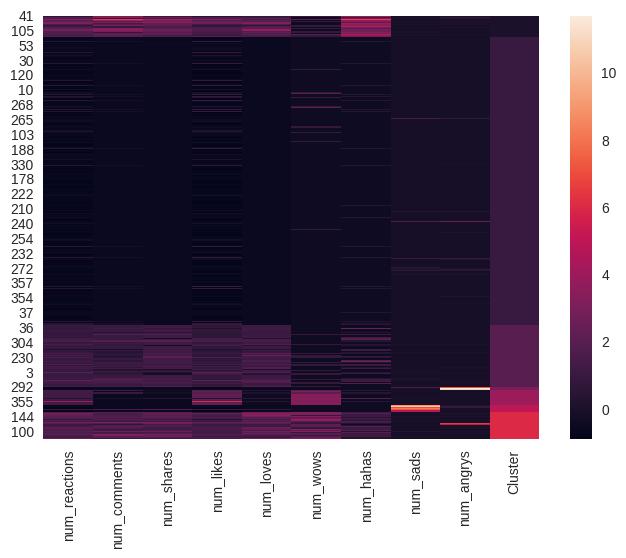

In [11]:
df=pd.DataFrame(data=data,columns=data_raw.columns[:-1])
df['Cluster']=pred
df.sort_values('Cluster',inplace=True, ascending=True)

sns.heatmap(df)